In [3]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [4]:
import sys
sys.path.insert(0, jaxqualin_path)

In [49]:
import qnm
import numpy as np
import matplotlib.pyplot as plt
import jaxqualin.plot

2023-10-02 12:03:00.230478: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-10-02 12:03:00.447025: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-10-02 12:03:00.461120: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [10]:
seq_220 = qnm.modes_cache(s=-2, l=2, m=2, n=0)
seq_2n20 = qnm.modes_cache(s=-2, l=2, m=-2, n=0)

In [37]:
spins = np.linspace(0, 0.95, 96)
omega = seq_220(0.5)
omega_220 = np.array([seq_220(spin)[0] for spin in spins])
omega_2n20 = np.array([seq_2n20(spin)[0] for spin in spins])

In [38]:
omegar_220 = np.real(omega_220)
omegai_220 = np.imag(omega_220)
omegar_2n20 = np.real(omega_2n20)
omegai_2n20 = np.imag(omega_2n20)

In [47]:
omega_0 = seq_220(0)[0]
omegar_0 = np.real(omega_0)
omegai_0 = np.imag(omega_0)

omega_9 = seq_220(0.9)[0]
omegar_9 = np.real(omega_9)
omegai_9 = np.imag(omega_9)

omega_n9 = seq_2n20(0.9)[0]
omegar_n9 = np.real(omega_n9)
omegai_n9 = np.imag(omega_n9)

In [61]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

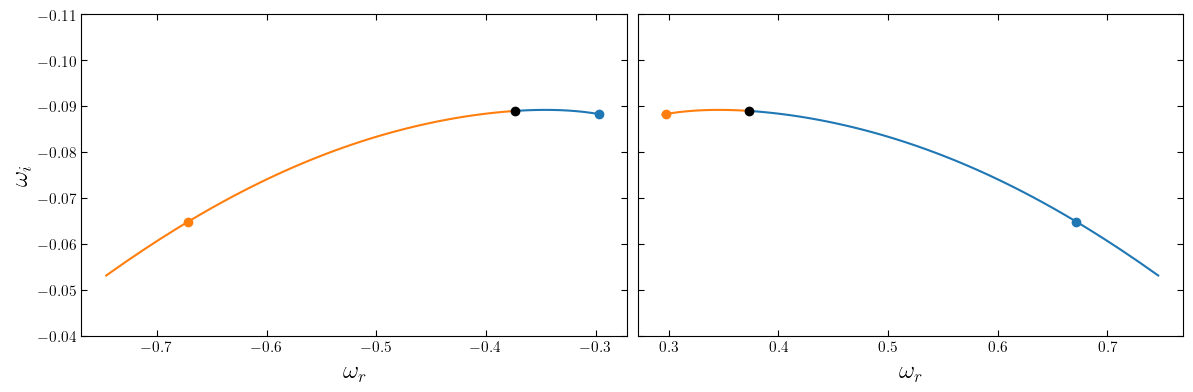

In [63]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4), sharey = True)

axs[1].plot(omegar_220, omegai_220, label='220', ls = '-', c = 'C0')
axs[1].plot(omegar_2n20, omegai_2n20, label='2n20', ls = '-', c = 'C1')
axs[0].plot(-omegar_220, omegai_220, label='220', ls = '-', c = 'C1')
axs[0].plot(-omegar_2n20, omegai_2n20, label='2n20', ls = '-', c = 'C0')

axs[1].scatter(omegar_0, omegai_0, c = 'k', zorder = 100)
axs[0].scatter(-omegar_0, omegai_0, c = 'k', zorder = 100)
axs[1].scatter(omegar_9, omegai_9, c = 'C0', zorder = 100)
axs[0].scatter(-omegar_9, omegai_9, c = 'C1', zorder = 100)
axs[1].scatter(omegar_n9, omegai_n9, c = 'C1', zorder = 100)
axs[0].scatter(-omegar_n9, omegai_n9, c = 'C0', zorder = 100)

for ax in axs:
    ax.set_xlabel(r'$\omega_r$')
    # ax.set_ylabel(r'$\omega_i$')
    ax.set_ylim(-0.04, -0.11)

axs[0].set_ylabel(r'$\omega_i$')

fig.tight_layout()
plt.subplots_adjust(wspace = 0.02)

plt.savefig('../../plots/retro_definition.pdf', bbox_inches = 'tight')